In [15]:
import urllib.request
import pandas as pd
import requests
import io
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot


In [16]:
link = "https://stats.idre.ucla.edu/stat/data/hsb2.csv"
webUrl = urllib.request.urlopen(link)
if webUrl.getcode() == 200:
    print("URL read successfully")
else:
    print("URL not read successfully, check url link/internet connection and try again")

URL read successfully


In [17]:
s = requests.get(link).content
hsb2 = pd.read_csv(io.StringIO(s.decode('utf-8')))

In [18]:
hsb2.head()

,id,female,race,ses,schtyp,prog,read,write,math,science,socst
0,70,0,4,1,1,1,57,52,41,47,57
1,121,1,4,2,1,3,68,59,53,63,61
2,86,0,4,3,1,1,44,33,54,58,31
3,141,0,4,3,1,3,63,44,47,53,56
4,172,0,4,2,1,2,47,52,57,53,61


In [19]:
hsb2.dtypes

id         int64
female     int64
race       int64
ses        int64
schtyp     int64
prog       int64
read       int64
write      int64
math       int64
science    int64
socst      int64
dtype: object

In [20]:
hsb2["race"] = hsb2["race"].astype('category')
hsb2["female"] = hsb2["female"].astype('category')
hsb2["ses"] = hsb2["ses"].astype('category')

In [22]:
hsb2.dtypes

id            int64
female     category
race       category
ses        category
schtyp        int64
prog          int64
read          int64
write         int64
math          int64
science       int64
socst         int64
dtype: object

In [23]:
import pandas as pd
import numpy as np
from scipy.optimize import minimize

# Assuming hsb2 is already defined as follows:
# hsb2 = pd.read_csv("hsb2.csv")

# Convert categorical variables to dummy variables
race = pd.get_dummies(hsb2['race'], drop_first=True, prefix='race')
ses = pd.get_dummies(hsb2['ses'], drop_first=True, prefix='ses')
female = pd.get_dummies(hsb2['female'], drop_first=True, prefix='female')

# Drop original categorical columns and add the new dummy variables
hsb3 = hsb2.drop(['race', 'ses', 'female'], axis=1)
hsb3 = pd.concat([hsb3, race, ses, female], axis=1)

hsb2["race_2"] = hsb2["race"].astype('int64')
hsb2["ses_2"] = hsb2["ses"].astype('int64')
hsb2["race_3"] = hsb2["race"].astype('int64')
hsb2["ses_3"] = hsb2["ses"].astype('int64')
hsb2["race_4"] = hsb2["race"].astype('int64')
hsb2["female"] = hsb2["female"].astype('int64')


# Define target variable and features
y = (hsb3['prog'] - 1).astype(int)  # Adjusting the labels to start from 0 and converting to integer
X = hsb3.drop(['prog', 'id'], axis=1)  # Convert features to numpy array



In [24]:
X.head()

,schtyp,read,write,math,science,socst,race_2,race_3,race_4,ses_2,ses_3,female_1
0,1,57,52,41,47,57,False,False,True,False,False,False
1,1,68,59,53,63,61,False,False,True,True,False,True
2,1,44,33,54,58,31,False,False,True,False,True,False
3,1,63,44,47,53,56,False,False,True,False,True,False
4,1,47,52,57,53,61,False,False,True,True,False,False


In [25]:
# Define the softmax function
def softmax(z):
    z = np.array(z)  # Ensure z is a numpy array
    if z.ndim == 1:
        z = z.reshape(1, -1)  # Reshape if z is a 1D array
    z = z - np.max(z, axis=1, keepdims=True)  # For numerical stability
    exp_z = np.exp(z)
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

# Define the log-likelihood function
def log_likelihood(params, X, y, num_classes):
    num_samples, num_features = X.shape
    # Reshape params and add zero coefficients for the reference class
    params = params.reshape((num_classes - 1, num_features + 1))
    beta = np.vstack([np.zeros((1, num_features + 1)), params])
    X_intercept = np.hstack([np.ones((num_samples, 1)), X])  # Add intercept term
    logits = np.dot(X_intercept, beta.T)
    probabilities = softmax(logits)
    ll = np.sum(np.log(probabilities[np.arange(num_samples), y]))
    return -ll  # We negate because we will be minimizing

# Fit the model
def fit_multinomial_logistic_regression(X, y, num_classes, max_iter=100):
    num_samples, num_features = X.shape
    initial_params = np.zeros((num_classes - 1, num_features + 1)).ravel()
    result = minimize(log_likelihood, initial_params, args=(X, y, num_classes),
                      method='L-BFGS-B', options={'maxiter': max_iter})
    # Add zero coefficients for the reference class to the result
    beta = np.vstack([np.zeros((1, num_features + 1)), result.x.reshape(num_classes - 1, num_features + 1)])
    return beta

# Define the number of classes based on your dataset
num_classes = len(np.unique(y))

# Fit the model
beta = fit_multinomial_logistic_regression(X.values, y.values, num_classes)

print("Intercept and Coefficients:")
print(beta)

TypeError: loop of ufunc does not support argument 0 of type float which has no callable exp method

In [26]:

# Define the softmax function
def softmax(z):
    z = np.array(z)  # Ensure z is a numpy array
    if z.ndim == 1:
        z = z.reshape(1, -1)  # Reshape if z is a 1D array
    z = z - np.max(z, axis=1, keepdims=True)  # For numerical stability
    exp_z = np.exp(z)
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

# Define the log-likelihood function
def log_likelihood(params, X, y, num_classes):
    num_samples, num_features = X.shape
    # Reshape params and add zero coefficients for the reference class
    params = params.reshape((num_classes - 1, num_features + 1))
    beta = np.vstack([np.zeros((1, num_features + 1)), params])
    X_intercept = np.hstack([np.ones((num_samples, 1)), X])  # Add intercept term
    logits = np.dot(X_intercept, beta.T)
    probabilities = softmax(logits)
    ll = np.sum(np.log(probabilities[np.arange(num_samples), y]))
    return -ll  # We negate because we will be minimizing

# Fit the model
def fit_multinomial_logistic_regression(X, y, num_classes, max_iter=100):
    num_samples, num_features = X.shape
    initial_params = np.zeros((num_classes - 1, num_features + 1)).ravel()
    result = minimize(log_likelihood, initial_params, args=(X, y, num_classes),
                      method='L-BFGS-B', options={'maxiter': max_iter})
    # Add zero coefficients for the reference class to the result
    beta = np.vstack([np.zeros((1, num_features + 1)), result.x.reshape(num_classes - 1, num_features + 1)])
    return beta

num_classes = len(np.unique(y))  # Define the number of classes based on your dataset

# Fit the model
beta = fit_multinomial_logistic_regression(X, y, num_classes)

print("Intercept and Coefficients:")
print(beta)

TypeError: loop of ufunc does not support argument 0 of type float which has no callable exp method

In [115]:
hsb3.head()

,id,schtyp,prog,read,write,math,science,socst,race_2,race_3,race_4,ses_2,ses_3,female_1
0,70,1,1,57,52,41,47,57,False,False,True,False,False,False
1,121,1,3,68,59,53,63,61,False,False,True,True,False,True
2,86,1,1,44,33,54,58,31,False,False,True,False,True,False
3,141,1,3,63,44,47,53,56,False,False,True,False,True,False
4,172,1,2,47,52,57,53,61,False,False,True,True,False,False


In [10]:
y = hsb3['prog']
X = hsb3.drop(['prog','id'],axis=1)
print(X.shape)

(200, 12)


In [11]:
import numpy as np
from scipy.optimize import minimize

# Define the softmax function
def softmax(z):
    return np.exp(z) / np.sum(np.exp(z), axis=1, keepdims=True)

# Define the log-likelihood function
def log_likelihood(params, X, y, num_classes):
    num_samples, num_features = X.shape
    # Reshape the parameter array into a coefficient matrix
    beta = params.reshape(num_classes, num_features + 1)
    # Add a column of ones for the intercept term
    X_intercept = np.hstack([np.ones((num_samples, 1)), X])
    
    # Compute the linear combination
    logits = np.dot(X_intercept, beta.T)
    # Compute the probabilities using the softmax function
    probabilities = softmax(logits)
    # Compute the log-likelihood
    ll = np.sum(np.log(probabilities[np.arange(num_samples), y]))
    return -ll  # Return the negative log-likelihood for minimization

# Define a function to fit the model
def fit_multinomial_logistic_regression(X, y, num_classes, max_iter=1000000):
    num_samples, num_features = X.shape
    # Initialize parameters
    initial_params = np.zeros((num_classes, num_features + 1)).ravel()
    # Optimize the log-likelihood function
    result = minimize(log_likelihood, initial_params, args=(X, y, num_classes),
                      method='L-BFGS-B', options={'maxiter': max_iter})
    # Reshape the result into the coefficient matrix
    beta = result.x.reshape(num_classes, num_features + 1)
    return beta


num_classes = 3



# Fit the model
beta = fit_multinomial_logistic_regression(X, y, num_classes)


print("Intercept and Coefficients:")
print(beta)

ll_model=-log_likelihood(beta, X, y, num_classes)
print(ll_model)



TypeError: loop of ufunc does not support argument 0 of type float which has no callable exp method

In [20]:
# define the multinomial logistic regression model with a default penalty
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', penalty='l2', 
                           C=1.0, max_iter = 1000000)
# define the model evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model and collect the scores
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report the model performance
print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Mean Accuracy: 0.605 (0.076)


In [21]:
result = model.fit(X, y)

In [22]:
row = X.iloc[0:1, :]
# predict a multinomial probability distribution
yhat = model.predict_proba(row)
# summarize the predicted probabilities
print('Predicted Probabilities: %s' % yhat[0])

Predicted Probabilities: [0.41802658 0.38916056 0.19281286]


In [13]:
# predict the class label
yhat = model.predict(row)
# summarize the predicted class
print('Predicted Class: %d' % yhat[0])

Predicted Class: 1


>0.0000 0.557 (0.090)
>0.0001 0.610 (0.072)
>0.0010 0.592 (0.074)
>0.0100 0.587 (0.087)
>0.1000 0.542 (0.101)
>1.0000 0.560 (0.086)


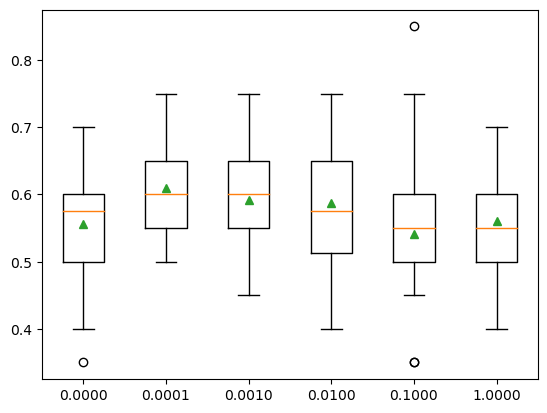

In [14]:
# get a list of models to evaluate
def get_models():
	models = dict()
	for p in [0.0, 0.0001, 0.001, 0.01, 0.1, 1.0]:
		# create name for model
		key = '%.4f' % p
		# turn off penalty in some cases
		if p == 0.0:
			# no penalty in this case
			models[key] = LogisticRegression(multi_class='multinomial', solver='lbfgs', penalty='none')
		else:
			models[key] = LogisticRegression(multi_class='multinomial', solver='lbfgs', penalty='l2', C=p)
	return models
# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model and collect the scores
	scores = evaluate_model(model, X, y)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize progress along the way
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show();

In [24]:
print(result.intercept_)
print("dvimvdfikgmfb")
print(result.coef_)

[-0.03499999 -5.26312933  5.29812932]
dvimvdfikgmfb
[[-0.01853798  0.12456048 -0.01750114 -0.00941341 -0.03176713  0.04841889
   0.00951909  0.81697744  0.12838444  0.16347083 -0.47413961 -0.49836098]
 [-0.13411336  0.69420737  0.02571986  0.02229972  0.07277303 -0.05093159
   0.03257294 -0.35029337 -0.11432353 -0.29302308 -0.22382163  0.36072192]
 [ 0.15265134 -0.81876785 -0.00821872 -0.01288631 -0.0410059   0.0025127
  -0.04209203 -0.46668407 -0.0140609   0.12955226  0.69796124  0.13763906]]


In [25]:
summary = pd.DataFrame(zip(X.columns, np.transpose(result.coef_.tolist()[0])), 
                       columns=['features', 'coef'])

In [26]:
print(summary)

   features      coef
0    female -0.018538
1    schtyp  0.124560
2      read -0.017501
3     write -0.009413
4      math -0.031767
5   science  0.048419
6     socst  0.009519
7    race_2  0.816977
8    race_3  0.128384
9    race_4  0.163471
10    ses_2 -0.474140
11    ses_3 -0.498361
